# sklearn中DBSCAN的使用，以及如何选取合适的参数值

## 生成随机数据

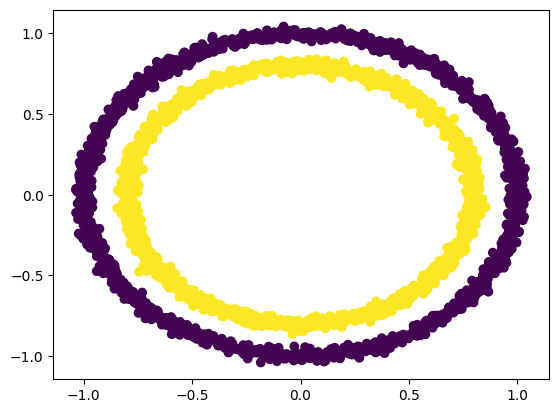

In [104]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# 生成随机数据集
X, y = make_circles(n_samples=3000, noise=0.02)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## 默认参数

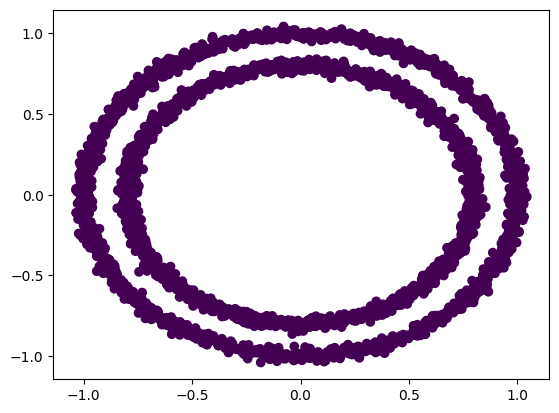

In [105]:
# eps表示邻域半径, min_samples表示邻域内最小样本数
model = DBSCAN(
    eps=0.5, # 默认值
    min_samples=5 # 默认值
)
model.fit(X)
y_hat = model.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_hat)
plt.show()

## Sorted k-dist graph

1. 计算每个样本点到其第k个近邻的距离
2. 对所有距离进行排序后画成折线图
3. 找到曲线的肘部，肘部对应的距离就是eps的取值, k的值就是min_samles的取值

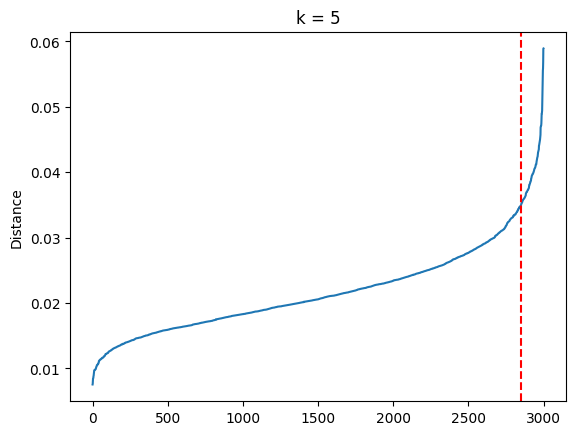

In [116]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nn = NearestNeighbors(n_neighbors=10).fit(X)
distances, indices = nn.kneighbors()

k = 5
sorted_distances = np.sort(distances[:, k-1])

plt.plot(sorted_distances)
plt.ylabel("Distance")
plt.title(f"k = {k}")
plt.axvline(2850, linestyle="--", color="red")
plt.show()

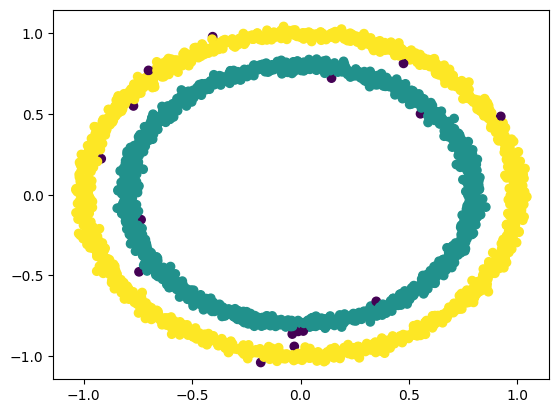

In [117]:
model = DBSCAN(eps=0.035 , min_samples=5)
model.fit(X)
y_hat = model.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_hat)
plt.show()

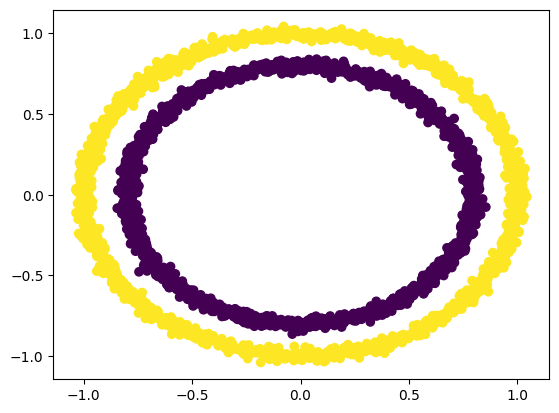

In [119]:
model = DBSCAN(eps=0.05 , min_samples=5)
model.fit(X)
y_hat = model.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_hat)
plt.show()